<a href="https://colab.research.google.com/github/kondakrishnaveni36/NEURAL-STYLE-TRANSFER/blob/main/Neural_Style_Transfer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow, TensorFlow Hub, and Matplotlib
!pip install tensorflow tensorflow_hub matplotlib

In [ ]:
# Import essential Python libraries
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [ ]:
# Function to load and prepare the image
def load_image(image_path, max_dim=512):
    img = Image.open(image_path).convert('RGB')
    img = img.resize((max_dim, max_dim))
    img = tf.keras.utils.img_to_array(img)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [ ]:
# Upload your images (content and style)
from google.colab import files
uploaded = files.upload()

Saving InShot_20250518_171415243.jpg to InShot_20250518_171415243.jpg


In [ ]:
# Upload your images (content and style)
from google.colab import files
uploaded = files.upload()

Saving Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg to Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg


In [ ]:
# Load the uploaded images (update filenames accordingly)
content_image = load_image("InShot_20250518_171415243.jpg")   # Replace with actual filename
style_image = load_image("Starry-Night-canvas-Vincent-van-Gogh-New-1889.jpg")       # Replace with actual filename

In [ ]:
# Load the pre-trained neural style transfer model from TensorFlow Hub
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [ ]:
# Apply the style to the content image
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

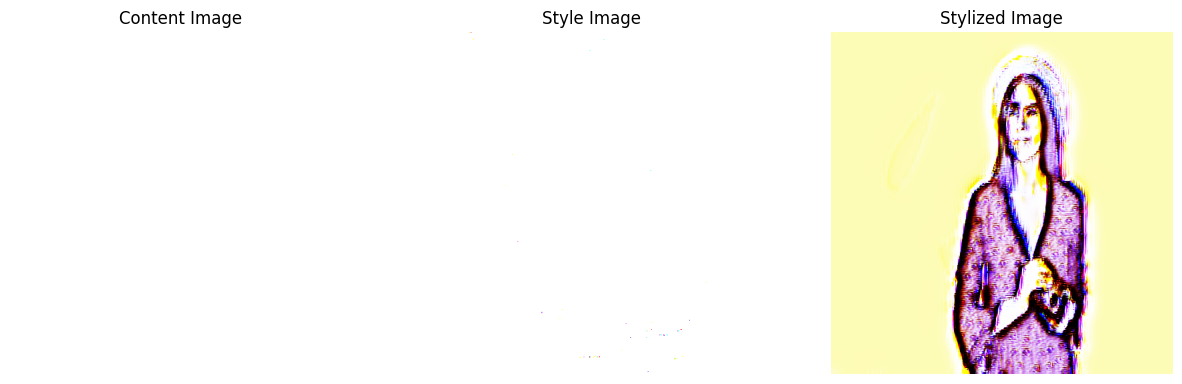

In [ ]:
# Function to display all images side by side
def show_images(content, style, stylized):
    plt.figure(figsize=(15, 5))
    titles = ['Content Image', 'Style Image', 'Stylized Image']
    for i, img in enumerate([content, style, stylized]):
        plt.subplot(1, 3, i+1)
        plt.imshow(tf.squeeze(img))
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

# Call the function to show images
show_images(content_image, style_image, stylized_image)